In [1]:
import seaborn as sns;sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir(r'C:\Users\dell\PycharmProjects\MachineLearning\Pandas\datasets')

In [7]:
tips = pd.read_csv('./tips.csv', index_col = 0)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
pokemon = pd.read_csv('./pokemon.csv', index_col = 0)
pokemon['Legendary'] = pokemon['Legendary'].apply(lambda v: ('Legendary', 'Normal')[v])
pokemon.tail()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,Normal
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,Normal
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,Normal
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,Normal
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,Normal


In [15]:
stats = pokemon.loc[:, ['HP', 'Attack','Defense', 'Legendary']]
stats.head()

,HP,Attack,Defense,Legendary
#,,,,
1,45,49,49,Legendary
2,60,62,63,Legendary
3,80,82,83,Legendary
3,80,100,123,Legendary
4,39,52,43,Legendary


# Create a PairGrid

**`sns.PairGird`**

```python
sns.PairGrid(
    data,
    hue=None,
    hue_order=None,
    palette=None,
    hue_kws=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    diag_sharey=True,
    height=2.5,
    aspect=1,
    despine=True,
    dropna=True,
    size=None,
)
```

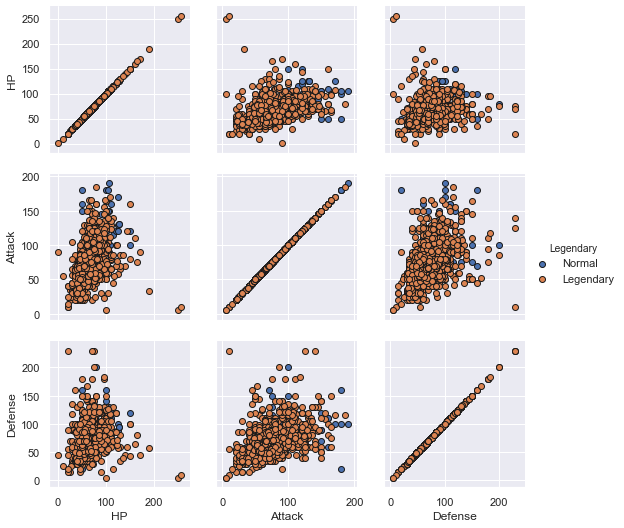

In [24]:
pair = sns.PairGrid(hue = 'Legendary', hue_order = ['Normal', 'Legendary'], data = stats)
#map every pantel using scatter
g = pair.map(plt.scatter, edgecolor = 'k')
g.add_legend()

or we can use:

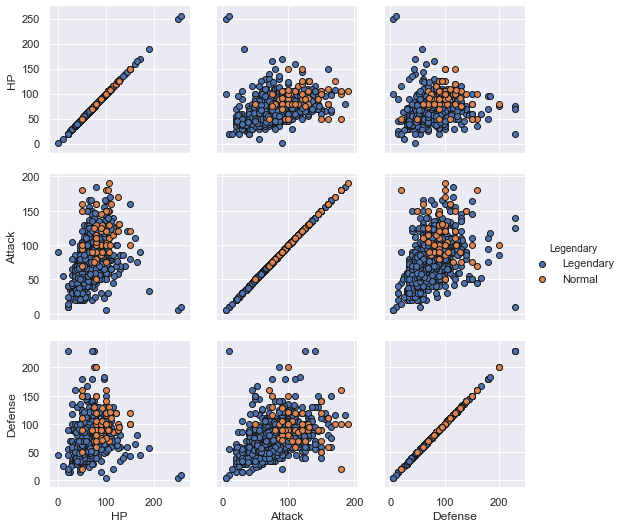

In [25]:
#we can pass the whole DataFrame(e.g: pokemon, not stats), and select columns of interested via keyword vars
pair = sns.PairGrid(hue = 'Legendary', vars = ['HP','Attack', 'Defense'], data = pokemon)
g = pair.map(plt.scatter, edgecolor = 'k')
g.add_legend()

different column names for row and column???

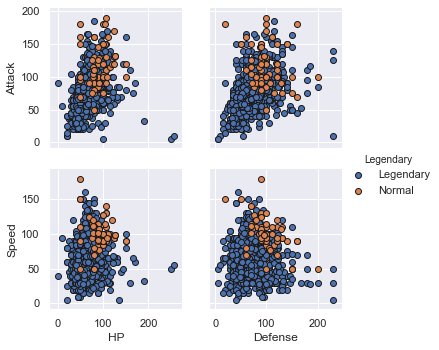

In [28]:
pair = sns.PairGrid(hue = 'Legendary', x_vars = ['HP', 'Defense'], y_vars = ['Attack', 'Speed'], data = pokemon)
g = pair.map(plt.scatter, ec = 'k')
g.add_legend()

# Mapping Functions

* **`PairGrid.map`**: using a plot function (e.g: scatter) for every panel
* **`PairGrid.map_diag`**: using a plot function for panels on the diagonal
* **`PairGrid.map_lower`**: using a plot function for panels on the lower triangle
* **`PairGrid.map_upper`**: using a plot function for panels on the upper triangle
* **`PairGrid.map_offdiag`**: using a plot function for every panel, except panels on the diagonal

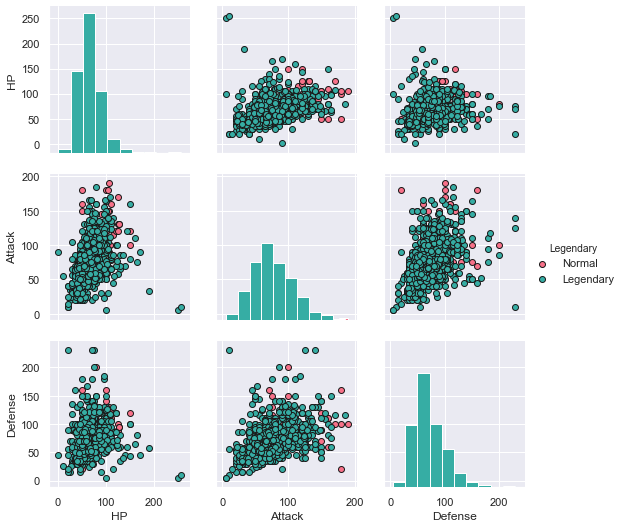

In [31]:
pair = sns.PairGrid(hue = 'Legendary', hue_order = ['Normal', 'Legendary'], palette = 'husl', data = stats)
pair.map_offdiag(plt.scatter, ec = 'k').add_legend()
pair.map_diag(plt.hist)

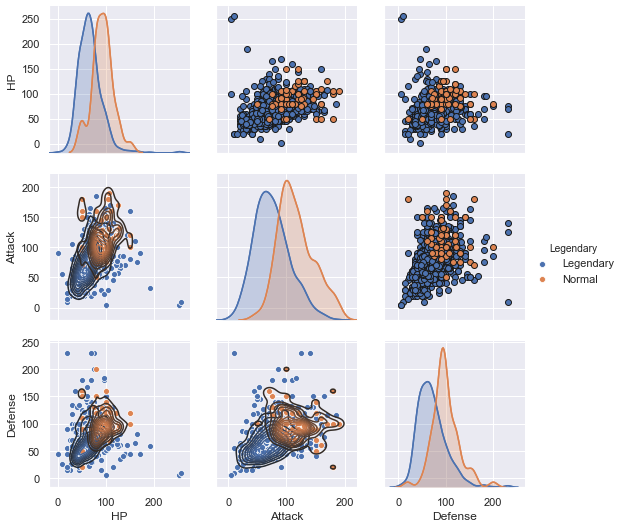

In [35]:
pair = sns.pairplot(hue = 'Legendary', data = stats)
pair.map_diag(sns.kdeplot)
pair.map_upper(plt.scatter, ec = 'k')
pair.map_lower(sns.kdeplot)